In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
from scipy import stats
from scipy.optimize import minimize as mini

In [76]:
def tuna_dif_distance(dif,
                    a = 0,
                    b = 0,
                    c = -np.inf,
                    d = np.inf,
                    e = 0,
                    f = 0,
                    g = 0,
                    h = 0,
                    i = 0,
                    j = 0,
                    k = 0,
                    l = 0,
                    m = 0,
                    n = 0,
                    o = 0,
                    ):
    """
    function of individual disagreements, sum_disagreement and length 
    constant and exponential for each
    knock-in for each
    knock-out for each
    Betas for each
    interactions for each
    """
    #dif = abs(query-target)

    #do these before so we can get interactions with division
    #may have to add jitter later
    
    total_disagreement = np.sum(dif)
    ind_disagreements = np.sum(dif**f)
    disagreement_length = len(dif)

    individuals = middle(a*total_disagreement**b,c,d) + middle(e*ind_disagreements,g,h) + middle(i*disagreement_length**j,k,l)
    interactions = m*total_disagreement*ind_disagreements + n*total_disagreement*disagreement_length + o*ind_disagreements*disagreement_length

    return individuals + interactions

def tuna_plus_distance(dif,
                        a = 0,
                        b = 0,
                        c = 0,
                        d = 0,
                        e = 0,
                        f = 0,
                        g = 0,
                        h = 0,
                        i = 0,
                        j = 0,
                        k = 0,
                        l = 0,
                        m = 0,
                        n = 0,
                        o = 0,
                        p = 0,
                        q = 0,
                        r = 0,
                        s = 0,
                        t = 0,
                        u = 0,
                        v = 0,
                        w = 0,
                        x = 0,
                        y = 0,
                        z = 0
                        ):

    merged = query + target
    concat = np.concatenate([query, target])
    merged_ent = a*stats.entropy(merged)**b
    norm_ent = c*scipy.stats.entropy(concat)**d
    query_ent = e*stats.entropy(query)**f
    target_ent = g*stats.entropy(target)**h
    len_merged = i*len(merged)**j
    len_concat = k*len(concat)**l


    ind_terms = (middle(merged_ent,m,n)
                 + middle(norm_ent,o,p)
                 + middle(query_ent,q,r)
                 + middle(target_ent,s,t)
                 + middle(len_merged,u,v)
                 + middle(len_concat,w,x)
    )
                
    interactions = y*merged_ent*norm_ent + z*merged_ent*len_merged 

    return 


In [77]:
def middle(element,lower,upper):
    """ 
    return middle element
    """

    if element>=lower:
        if element<= upper:
            return element
        else:
            return upper
    else:
        return lower

middle(0,0,1)

0

Results for Different Ways of Distributing Interpectral Intensity Difference

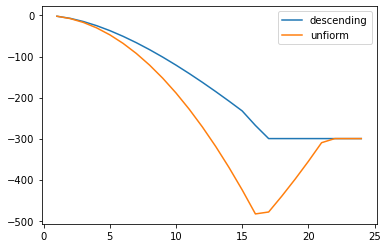

In [78]:
xs=list()
scores_1=list()
scores_2=list()

total_difference = 0.9
len_difference = 10
max_len = 25

func1 = partial(tuna_dif_distance,e=1,f=-1,h=500, i=-3,j=2,k=-800)
func2 = partial(tuna_dif_distance,e=1,f=-1,h=500,i=-3,j=2,k=-800)

normalize = False

for i in range(1,max_len):

    xs.append(i)
    dif_1 = np.array([1/(x+1) for x in range(i)])
    dif_1 = dif_1/sum(dif_1)*total_difference

    dif_2 = np.array([total_difference/i for x in range(i)])

    if normalize:
        scores_1.append(1- 1/func1(dif_1))
        scores_2.append(1 - 1/func2(dif_2))
    else:
        scores_1.append(func1(dif_1))
        scores_2.append(func2(dif_2))

plt.plot(xs, scores_1, label='descending')
plt.plot(xs, scores_2, label='unfiorm')

plt.legend()
plt.show()

In [79]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [168]:
df_ex = pd.DataFrame({'match':[1 for i in range(10000)],'dif':[dif_1 for i in range(10000)]})

In [178]:
def objective_ind(x, match,dif,loss_func, reg_func, distance_func):

    return loss_func(match - distance_func(dif, x[0], x[1])) + reg_func(x)

def objective(x, args, loss_func, reg_func, distance_func):

    kwargs = {k:v for k,v in zip(args[0],x)}
    return np.sum(args[1].apply(lambda i: loss_func(i['match'] - distance_func(i['dif'],**kwargs)),axis=1) + reg_func(x))

objective_ = partial(objective, loss_func = lambda x: x**2, reg_func= lambda x: 1.*sum(np.abs(x)), distance_func=tuna_dif_distance)

mini(fun=objective_, x0=[2,3], args=[['a','b'],df_ex], tol=1e-10, method = 'L-BFGS-B')

      fun: 7500.0000073629635
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.33966455e-01,  9.56164395e+03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 240
      nit: 22
     njev: 80
   status: 0
  success: True
        x: array([ 4.99983293e-01, -4.82579369e-10])

In [177]:
tuna_dif_distance(dif_1,**{'a':3})

3.0

In [170]:
def objective_ind_old(x, old_args, loss_func, reg_func):

    return loss_func(old_args[0] - tuna_dif_distance(old_args[1], x[0], x[1])) + reg_func(x)

objective_ind_old_ = partial(objective_ind_old, loss_func = lambda x: x**2, reg_func= lambda x: 1.*sum(np.abs(x)))
mini(fun=objective_ind_old_, x0 = [1,1], args = [1,dif_1],tol=1e-10 )

      fun: 0.7807324353428582
 hess_inv: array([[0.41629099, 0.00263132],
       [0.00263132, 0.28424669]])
      jac: array([-0.35061334,  0.29950449])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 315
      nit: 2
     njev: 101
   status: 2
  success: False
        x: array([ 3.24693326e-01, -5.56334712e-09])

In [146]:
def custom_grad_descent(func, params, vals, constraints, epsilons, data, max_iter):
    """ 
    Implement gradient descent for model tuning
    func must take: match, query, target
    """

    return 1
    i=0
    while i<max_iter:

        index = i % len(data)

        loss = func(data.iloc[index]['match'], data.iloc[index]['query'], data.iloc[index]['target'])

#objective_ = partial(objective, loss_func = lambda x: x**2, reg_func= lambda x: 0.*sum(abs(x)))
mini(fun=objective_ind_, x0 = [1,1], args = [1,dif_1],tol=1e-10 )






TypeError: objective_ind() missing 1 required positional argument: 'dif'

In [131]:
df_ex = pd.DataFrame([[1,dif_1],[1,dif_1]], columns=['match','dif'])

In [126]:
objective_([1,1],df_ex)

TypeError: Cannot index by location index with a non-integer key

TypeError: bad operand type for abs(): 'list'